In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
file_path = "./results/mia2_law_sex_mia_privacy_risks_metrics_2024-12-30.csv"
df = pd.read_csv(file_path)

In [62]:
df

,Unnamed: 0,Method,Metric,Mean Privacy Risk,Error
0,0,orig,entire_dataset_mia_privacy_risk,0.511864,0.004637
1,1,orig,subpopulation_0.0_label_0.0_mia_privacy_risk,0.726223,0.041038
2,2,orig,subpopulation_0.0_label_1.0_mia_privacy_risk,0.513854,0.007953
3,3,orig,subpopulation_1.0_label_0.0_mia_privacy_risk,0.726919,0.048701
4,4,orig,subpopulation_1.0_label_1.0_mia_privacy_risk,0.509013,0.008729
5,5,transf,entire_dataset_mia_privacy_risk,0.513206,0.005630
6,6,transf,subpopulation_0.0_label_0.0_mia_privacy_risk,0.741341,0.042101
7,7,transf,subpopulation_0.0_label_1.0_mia_privacy_risk,0.516395,0.008342
8,8,transf,subpopulation_1.0_label_0.0_mia_privacy_risk,0.725653,0.040724
9,9,transf,subpopulation_1.0_label_1.0_mia_privacy_risk,0.510146,0.011073


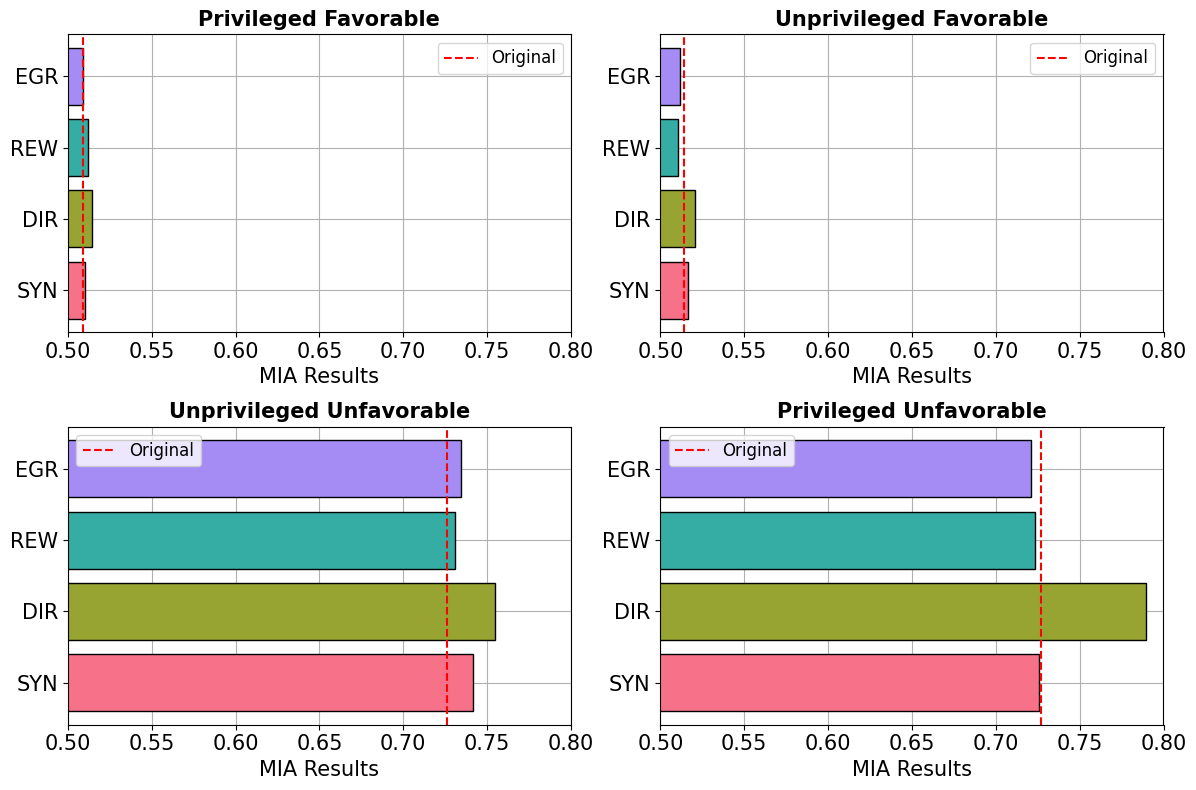

In [64]:
# Define subpopulations and methods
subpopulations = [
    "Privileged Favorable", 
    "Unprivileged Favorable", 
    "Unprivileged Unfavorable", 
    "Privileged Unfavorable"
]
subpop_mapping = {
    "Privileged Favorable": "subpopulation_1.0_label_1.0_mia_privacy_risk",
    "Unprivileged Favorable": "subpopulation_0.0_label_1.0_mia_privacy_risk",
    "Unprivileged Unfavorable": "subpopulation_0.0_label_0.0_mia_privacy_risk",
    "Privileged Unfavorable": "subpopulation_1.0_label_0.0_mia_privacy_risk",
}

methods = ["SYN", "DIR", "REW", "EGR"]
method_mapping = {
    "transf": "SYN",
    "eg": "EGR",
    "dir": "DIR",
    "rew": "REW",
}

# Prepare data for plotting
data = {subpop: [] for subpop in subpopulations}
orig_values = {}

for subpop, metric in subpop_mapping.items():
    # Extract Original method values
    orig_value = df[(df["Method"] == "orig") & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
    orig_values[subpop] = orig_value

    # Extract other method values
    for method, display_name in method_mapping.items():
        value = df[(df["Method"] == method) & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
        data[subpop].append(value)

# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
palette = sns.color_palette("husl", len(methods))

for idx, subpop in enumerate(subpopulations):
    accuracies = data[subpop]
    ax = axes[idx]
    
    # Push gridlines to the back
    ax.set_axisbelow(True)

    # Horizontal bar chart
    ax.barh(methods, accuracies, color=palette, edgecolor='black')

    # Add dashed line for 'orig' MIA accuracy
    ax.axvline(orig_values[subpop], color='red', linestyle='--', label='Original')

    # Enable gridlines
    ax.grid(True)

    # Title and labels
    ax.set_title(f"{subpop}", fontsize=15, weight='bold')
    ax.set_xlabel("MIA Results", fontsize=15)
    ax.set_xlim(0.5, 0.80)  # Adjust range if needed

    # Adjust tick label font size
    ax.tick_params(axis='y', labelsize=15)  # Methods
    ax.tick_params(axis='x', labelsize=15)  # X-axis values

    # Adjust legend font size
    ax.legend(fontsize=12)

plt.tight_layout()
plt.show()